In [1]:
%load_ext autoreload

%autoreload 2
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.svm import SVC
 
from sklearn import metrics

from mlxtend.plotting import plot_decision_regions
from sklearn import preprocessing, metrics
from sklearn.linear_model import LogisticRegression

import warnings
import numpy as np
from collections import OrderedDict

from lob_data_utils import lob, db_result, model
from lob_data_utils import roc_results, gdf_pca
from lob_data_utils.svm_calculation import lob_svm


sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

In [2]:
data_length = 10000
stocks = list(roc_results.results_10000.keys())
should_save_fig = False

In [3]:
d_stocks = {}
d_cv_stocks = {}
d_test_stocks = {}
for s in stocks:
    d, d_test = lob.load_prepared_data(
        s, data_dir='../queue_imbalance/data/prepared', cv=False, length=data_length)
    d.index = pd.to_datetime(d['Unnamed: 0'].values)
    d_test.index = pd.to_datetime(d_test['Unnamed: 0'].values)
    d_stocks[s] = d
    d_test_stocks[s] = d_test

In [4]:
def get_scores_dict_for_data(functions_to_run, dfs, clf, stock):
    scores = {'stock': stock}
    for func_name, func in functions_to_run.items():
        for df_name, df in dfs.items():
            pred = clf.predict(df['queue_imbalance'].values.reshape(-1, 1))
            scores['{}_{}'.format(df_name, func_name)] = func(df['mid_price_indicator'], pred)
    return scores
            
functions_to_run = {'precision': metrics.precision_score, 'roc_auc': metrics.roc_auc_score,
                   'f1_score': metrics.f1_score, 'recall': metrics.recall_score,
                   'matthews': metrics.matthews_corrcoef, 'kappa': metrics.cohen_kappa_score}
scores = []
for stock in stocks:
    log_clf = LogisticRegression(random_state=21312)
    res_train = model.validate_model(log_clf, d_stocks[stock][['queue_imbalance']], 
                         d_stocks[stock]['mid_price_indicator'])
    dfs = {'test': d_test_stocks[stock]}
    res = get_scores_dict_for_data(functions_to_run, dfs, log_clf, stock)
    

    res = {**res, **res_train}
    scores.append(res)
df_scores = pd.DataFrame(scores, index=stocks)

In [5]:
def convert_scores(df, column):
    scores = []
    for i, row in df.iterrows():
        scores.append(np.mean(row[column]))
    return scores
scores_columns = ['f1', 'kappa', 'matthews', 'precision', 'recall', 'roc_auc', 'train_f1', 'train_kappa',
       'train_matthews', 'train_precision', 'train_recall', 'train_roc_auc']

for col in scores_columns:
    df_scores[col] = convert_scores(df_scores, col)
df_scores

,f1,kappa,matthews,precision,recall,roc_auc,stock,test_f1_score,test_kappa,test_matthews,test_precision,test_recall,test_roc_auc,train_f1,train_kappa,train_matthews,train_precision,train_recall,train_roc_auc
9069,0.556665,0.104795,0.107065,0.566782,0.557027,0.552507,9069,0.598182,0.113692,0.115421,0.554806,0.648915,0.556709,0.568063,0.128678,0.128726,0.570292,0.566057,0.564333
9063,0.525106,0.109296,0.111922,0.564349,0.499221,0.554976,9063,0.545274,0.086000,0.086004,0.548000,0.542574,0.543004,0.529830,0.119989,0.120726,0.559569,0.504733,0.559862
1472,0.583823,0.145664,0.148600,0.579782,0.600819,0.572888,1472,0.627148,0.116036,0.118223,0.580286,0.682243,0.557251,0.587797,0.139882,0.140145,0.574841,0.601671,0.569842
9094,0.556465,0.118450,0.120071,0.568243,0.551139,0.559200,9094,0.583333,0.128949,0.129138,0.568627,0.598820,0.564415,0.549671,0.108316,0.108476,0.552799,0.547731,0.554120
9270,0.532698,0.127469,0.129431,0.572619,0.503457,0.563917,9270,0.561171,0.070005,0.070337,0.536585,0.588119,0.534968,0.553941,0.136966,0.137361,0.563919,0.545592,0.568378
10166,0.541268,0.122708,0.123708,0.560844,0.526689,0.561477,10166,0.531346,0.088867,0.089167,0.554721,0.509862,0.544485,0.544640,0.102552,0.102734,0.548536,0.541628,0.551223
9061,0.503022,0.095897,0.098354,0.550373,0.470231,0.548135,9061,0.485511,0.057771,0.058480,0.530466,0.447581,0.528850,0.506639,0.078463,0.079065,0.534294,0.483654,0.539110
2651,0.553881,0.123889,0.125634,0.571603,0.545212,0.562340,2651,0.597790,0.161912,0.162023,0.587347,0.608611,0.580890,0.557027,0.126957,0.127145,0.562014,0.553108,0.563422
4060,0.592910,0.134835,0.136666,0.580287,0.612376,0.567394,4060,0.573308,0.095460,0.096997,0.529055,0.625641,0.547942,0.604533,0.142214,0.143034,0.577073,0.634890,0.570882
12456,0.596622,0.130452,0.132153,0.570615,0.628931,0.565317,12456,0.561743,0.094094,0.094105,0.557692,0.565854,0.547029,0.607567,0.150679,0.151714,0.583972,0.634071,0.574980


,test_matthews,matthews,test_roc_auc,roc_auc
count,53.000000,53.000000,53.000000,53.000000
mean,0.117200,0.128960,0.557947,0.563567
std,0.031046,0.022608,0.015326,0.011248
min,0.058480,0.070654,0.528850,0.535216
25%,0.097135,0.115615,0.548574,0.557136
50%,0.111741,0.129645,0.555828,0.563917
75%,0.138012,0.142499,0.568627,0.570582
max,0.203627,0.186824,0.601087,0.592373


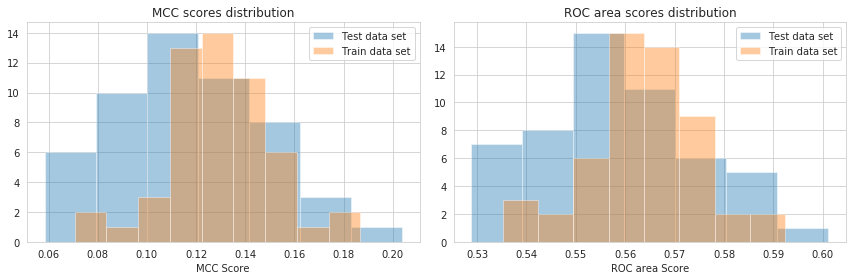

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.distplot(df_scores['test_matthews'], kde=False, label='Test data set', ax=ax1)
sns.distplot(df_scores['matthews'], kde=False, label='Train data set', ax=ax1)

ax1.legend()
ax1.set_xlabel('MCC Score')
ax1.set_title('MCC scores distribution')

sns.distplot(df_scores['test_roc_auc'], kde=False, label='Test data set', ax=ax2)
sns.distplot(df_scores['roc_auc'], kde=False, label='Train data set', ax=ax2)

ax2.legend()
ax2.set_xlabel('ROC area Score')
ax2.set_title('ROC area scores distribution')
plt.tight_layout()
#plt.savefig('results_log_que_score_dist.png')

df_scores[['test_matthews', 'matthews', 'test_roc_auc', 'roc_auc']].describe()

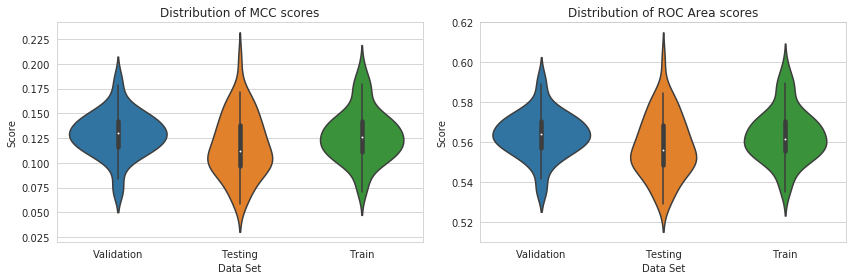

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

columns = ['stock', 'matthews', 'roc_auc', 
           'test_matthews', 'test_roc_auc', 'train_matthews', 'train_roc_auc']

df = df_scores[columns].copy()
df.rename(columns={'matthews': 'Validation', 'test_matthews': 'Testing', 'train_matthews': 'Train'}, inplace=True)
df = df.melt(['stock', 'roc_auc', 'test_roc_auc', 'train_roc_auc'])
sns.violinplot(x="variable", y="value", data=df, ax=ax1)
ax1.set_title('Distribution of MCC scores')

ax1.set_xlabel('Data Set')
ax1.set_ylabel('Score')

df = df_scores[columns].copy()
df.rename(columns={'roc_auc': 'Validation', 'test_roc_auc': 'Testing', 'train_roc_auc': 'Train'}, inplace=True)
df = df.melt(['stock', 'matthews', 'test_matthews', 'train_matthews'])

ax2.set_title('Distribution of ROC Area scores')

sns.violinplot(x="variable", y="value", data=df, ax=ax2)
ax2.set_xlabel('Data Set')
ax2.set_ylabel('Score')

plt.tight_layout()
plt.savefig('violin_distribution_scores_log_que.png')

In [8]:
print(df_scores[['test_matthews', 'matthews', 'test_roc_auc', 'roc_auc']].describe().to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  test\_matthews &   matthews &  test\_roc\_auc &    roc\_auc \\
\midrule
count &      53.000000 &  53.000000 &     53.000000 &  53.000000 \\
mean  &       0.117200 &   0.128960 &      0.557947 &   0.563567 \\
std   &       0.031046 &   0.022608 &      0.015326 &   0.011248 \\
min   &       0.058480 &   0.070654 &      0.528850 &   0.535216 \\
25\%   &       0.097135 &   0.115615 &      0.548574 &   0.557136 \\
50\%   &       0.111741 &   0.129645 &      0.555828 &   0.563917 \\
75\%   &       0.138012 &   0.142499 &      0.568627 &   0.570582 \\
max   &       0.203627 &   0.186824 &      0.601087 &   0.592373 \\
\bottomrule
\end{tabular}



In [9]:
df_scores.to_csv('res_log_que.csv')